In [0]:
from google.colab import drive
import zipfile
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TensorBoard
from keras.models import Model
from sklearn.model_selection import train_test_split
import keras.backend as K
import numpy as np
import os
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import pandas as pd

In [33]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pathdata17zip = '/content/drive/My Drive/data17.zip'

In [0]:
zip_ref = zipfile.ZipFile(pathdata17zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
datasetPath = '/tmp/data17'

In [0]:
lengths = []
minLength = 2000

In [0]:
def padding(fname):
    f = open(fname, "r")
    y = f.read()
    f.close()
    
    origy = y
    while (len(y) < minLength):
        y += origy
        
    f = open(fname, "w")
    f.write(y)
    f.close()
    return y

In [39]:
top_10 = [0,0,0,0,0,0,0,0,0,0]
top_dir = ['','','','','','','','','','']
for r,d,f in os.walk(datasetPath):
  for di in d:
    for r1, d1, f1 in os.walk(os.path.join(r, di)):
      _len = len(f1)
      for i, ind in enumerate(top_10):
        if _len > top_10[i]:
          top_10[i] = _len
          top_dir[i] = os.path.join(r, di)
          break
print(top_10)
print(top_dir)
names = []
for auth in top_dir:
  names.append(auth.split('/')[-1])

[32, 32, 25, 25, 25, 23, 22, 21, 21, 20]
['/tmp/data17/simonlindholm', '/tmp/data17/Xellos', '/tmp/data17/kawaiigabrielneko', '/tmp/data17/kmjp', '/tmp/data17/ccsnoopy', '/tmp/data17/minaminao', '/tmp/data17/luki4824', '/tmp/data17/LEcry', '/tmp/data17/VAVAvile', '/tmp/data17/aan93']


In [40]:
print(names)

['simonlindholm', 'Xellos', 'kawaiigabrielneko', 'kmjp', 'ccsnoopy', 'minaminao', 'luki4824', 'LEcry', 'VAVAvile', 'aan93']


In [41]:
inp = []
out = []
count = 0
for di in top_dir:
  for r, d, f in os.walk(di):
    for fil in f:
      inp.append(os.path.join(r, fil))
      out.append(count)
  count += 1
print(out)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [42]:
len(inp)

246

In [0]:
counter = [0]

In [0]:
x_train = []
x_test = []
y_train = []
y_test = []
x_val = []
y_val = []

In [45]:
for i in range(0,3):
    print(i)
    lengths = []
    count = 0
    for fil in inp:
        f = open(fil, "r")
        x = f.read()
        y = x.split()
        f.close()
        if(len(x) <= 100):
            inp.remove(fil)
        elif len(x) == 0:
            inp.remove(fil)
        elif(len(y) < minLength):
            x = padding(fil)
            lengths.append(len(x))
        else:
            lengths.append(len(x))

0
1
2


In [0]:
x_train, X_test, y_train, Y_test = train_test_split(inp, out, test_size=0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

for d in top_dir:
  check(os.path.join(r, d), counter)

In [47]:
_check = []
for x in y_train:
  if x not in _check:
    _check.append(x)
print(len(_check))
print(counter)

10
[0]


In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

x_train = np.array(X_train)
x_test = np.array(X_test)
x_val = np.array(X_val)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
y_val = np.array(Y_val)

indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

indices = np.arange(x_test.shape[0])
np.random.shuffle(indices)
x_test = x_test[indices]
y_test = y_test[indices]

indices = np.arange(x_val.shape[0])
np.random.shuffle(indices)
x_val = x_val[indices]
y_val = y_val[indices]

In [49]:
vocab = {}
count = [0]
for fil in inp:
  f = open(fil)
  x = f.read()
  for line in x:
    for letter in line:
      if letter not in vocab.keys():
        vocab[letter] = count[0]
        count[0] += 1 
print(count)

[94]


In [0]:
def getFiles(path):
    matrix = []
    for p in path:
        tmp = np.zeros((50, 40), dtype = int)
        f = open(p)
        for i in range(0,50):
            for j in range(0, 40):
                tmp[i][j] = vocab[f.read(1)]
        matrix.append(tmp)
    return np.array(matrix)

In [0]:
num_classes = 10
input_shape = (50, 40)
batch_size = 2
def data_generator(file_paths, author_numbers):
    batch_start = 0
    batch_end = batch_start + batch_size
    n = file_paths.shape[0]
    indexes = np.arange(0, n, batch_size)
    if n % batch_size != 0:
        indexes = indexes[:-1] 
    while True:
        np.random.shuffle(indexes)
        for ind in indexes:
            batch_start = ind
            batch_end = batch_start + batch_size
            myFiles = file_paths[batch_start:batch_end]
            batch_files = getFiles(myFiles)
            batch_authors = author_numbers[batch_start:batch_end]
            batch_x = np.zeros((batch_size, 50, 40))
            tmp = np.zeros((batch_size, num_classes))
            batch_x = np.array( batch_files )
            for i, j in enumerate(batch_authors):
                tmp[i][j] = 1
            batch_y = np.array( tmp )
            yield( batch_x, batch_y )

In [0]:
input_fil = Input(shape=(input_shape), name='input_fil')
conv1 = Conv1D(128, kernel_size=7, strides = 2,  activation='relu')(input_fil)
drop1 = Dropout(0.2)(conv1)
conv = Conv1D(64, kernel_size=7, strides = 2,  activation='relu')(drop1)
maxP = MaxPooling1D()(conv)
flat = Flatten()(maxP)
output_class = Dense(num_classes, activation='softmax')(flat)

model = Model(inputs=input_fil, outputs=output_class)

In [53]:
adam = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_fil (InputLayer)       (None, 50, 40)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 22, 128)           35968     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 8, 64)             57408     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570

In [0]:
train_gen = data_generator(X_train, Y_train)
test_gen = data_generator(X_test, Y_test)
val_gen = data_generator(X_val, Y_val)

In [55]:
hist1 = model.fit_generator(train_gen, epochs=20, steps_per_epoch=len(Y_train)//batch_size, 
                           validation_data=val_gen, validation_steps=len(Y_val)//batch_size, verbose=1)

Epoch 1/20
78/78 [==============================] - 1s 14ms/step - loss: 11.9785 - acc: 0.1346 - val_loss: 9.7971 - val_acc: 0.2500
Epoch 2/20
78/78 [==============================] - 1s 8ms/step - loss: 8.3756 - acc: 0.2949 - val_loss: 7.6744 - val_acc: 0.3250
Epoch 3/20
78/78 [==============================] - 1s 8ms/step - loss: 6.0311 - acc: 0.4615 - val_loss: 5.8025 - val_acc: 0.4750
Epoch 4/20
78/78 [==============================] - 1s 8ms/step - loss: 4.7291 - acc: 0.5256 - val_loss: 5.1240 - val_acc: 0.5250
Epoch 5/20
78/78 [==============================] - 1s 8ms/step - loss: 3.3836 - acc: 0.6218 - val_loss: 4.0966 - val_acc: 0.5250
Epoch 6/20
78/78 [==============================] - 1s 8ms/step - loss: 2.3802 - acc: 0.6987 - val_loss: 3.0372 - val_acc: 0.6500
Epoch 7/20
78/78 [==============================] - 1s 8ms/step - loss: 1.6911 - acc: 0.7179 - val_loss: 2.3094 - val_acc: 0.5750
Epoch 8/20
78/78 [==============================] - 1s 8ms/step - loss: 0.8473 - acc: 0.

In [56]:
xtestdata = getFiles(X_test)
print(xtestdata.shape)

(50, 50, 40)


In [57]:
preds = model.predict(xtestdata)
print(preds.shape)

(50, 10)


In [58]:
myPreds = []
for i in preds:
    myPreds.append(np.argmax(i))
myPreds = np.array(myPreds)
print(myPreds.shape)

(50,)


In [59]:
count = 0
for i in range(myPreds.shape[0]):
    if myPreds[i] == Y_test[i]:
        count += 1

acc = (count / myPreds.shape[0]) * 100
print("Accuracy", acc)

Accuracy 80.0


In [60]:

names = list(names)
values = list([0,1,2,3,4,5,6,7,8,9])
pd.DataFrame.from_dict({'Values': values, 'Names': names})

,Values,Names
0,0,simonlindholm
1,1,Xellos
2,2,kawaiigabrielneko
3,3,kmjp
4,4,ccsnoopy
5,5,minaminao
6,6,luki4824
7,7,LEcry
8,8,VAVAvile
9,9,aan93


In [0]:
y_target = Y_test
y_predicted = myPreds

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)
# cm

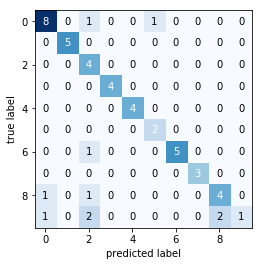

In [62]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [63]:
print(len(Y_test))
print(len(X_train))

50
156


In [0]:
map = {}
for i, fil in enumerate(X_test):
  _fil = fil.split('/')[-1]
  map[_fil] =  Y_test[i]
  fname = '/content/drive/My Drive/files/obf_before4/' + _fil
  x = open(fil).read()
  f = open(fname, 'w+')
  f.write(x)
  f.close()

In [65]:
print(len(X_test))

50


In [66]:
print(Y_test)

[1 0 6 2 5 6 7 3 0 9 9 8 9 6 2 8 8 0 6 0 4 0 3 2 8 5 7 0 0 3 8 9 4 0 9 0 4
 7 1 1 8 3 1 6 0 4 2 6 1 9]


In [67]:
path = '/content/drive/My Drive/files/obf_after4'
inp = []

for r,d,f in os.walk(path):
  for fil in f:
    inp.append(os.path.join(r,fil))
Y_test = []
for fil in inp:
  _fil = fil.split('/')[-1]
  Y_test.append(map[_fil])
print(Y_test)

[9, 2, 8, 8, 0, 0, 6, 9, 9, 6, 7, 7, 0, 9, 1, 7, 1, 8, 9, 1, 5, 9, 1, 0, 8, 6, 4, 0, 8, 2, 8, 1, 2, 6, 4, 3, 4, 3, 2, 4, 0, 0, 0, 0, 5, 6, 6, 3, 3, 0]


In [0]:
for i in range(0,3):
    print(i)
    lengths = []
    count = 0
    for fil in inp:
        f = open(fil, "r")
        x = f.read()
        y = x.split()
        f.close()
        if(len(x) <= 100):
            inp.remove(fil)
        elif len(x) == 0:
            inp.remove(fil)
        elif(len(y) < minLength):
            x = padding(fil)
            lengths.append(len(x))
        else:
            lengths.append(len(x))

0
1
2


In [0]:
x_test_data = getFiles(inp)

In [0]:
preds = model.predict(x_test_data)

In [70]:
myPreds = []
for i in preds:
    myPreds.append(np.argmax(i))
myPreds = np.array(myPreds)
print(myPreds.shape)

(50,)


In [71]:
print(len(Y_test))

50


In [72]:
count = 0
for i in range(myPreds.shape[0]):
    if myPreds[i] == Y_test[i]:
        count += 1

acc = (count / myPreds.shape[0]) * 100
print("Accuracy", acc)

Accuracy 14.000000000000002


In [0]:
y_target = Y_test
y_predicted = myPreds

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

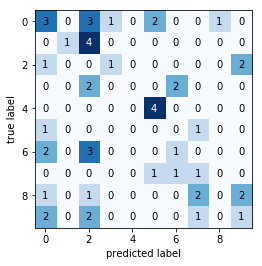

In [74]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()